In [323]:
#! pip install pillow
#! pip install matplotlib
#! pip install scikit-image

In [324]:
from PIL import Image
from google.colab import drive
import cv2
import matplotlib.pyplot as plt
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


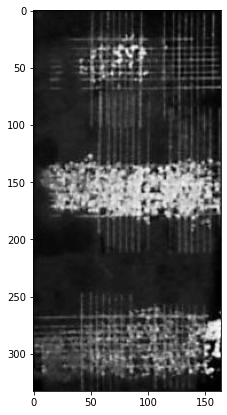

In [325]:
img = cv2.imread("/content/drive/MyDrive/Quadrillage/253.jpg", 0)
def plotimg(img):
  plt.figure(figsize=(10, 7))
  plt.subplot(1,1,1)
  plt.imshow(img, cmap="Greys_r")
  plt.show();
plotimg(img)

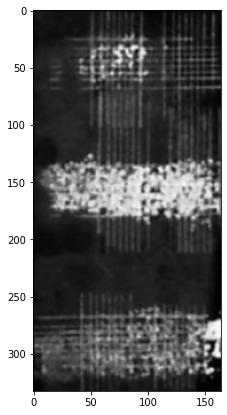

In [326]:
blur = cv2.GaussianBlur(img, (3, 3), 0)
plotimg(blur)

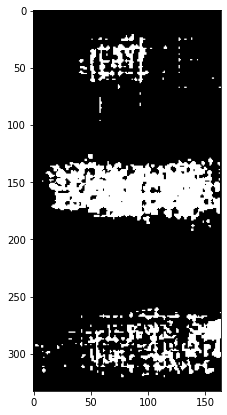

In [327]:
ret, thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plotimg(thresh)

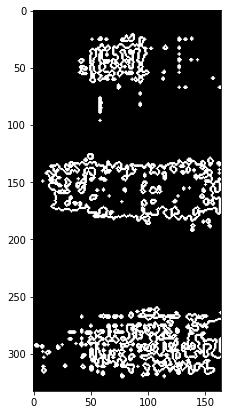

In [328]:
placien = cv2.Laplacian(thresh, cv2.CV_16S, ksize=1)
placien = cv2.convertScaleAbs(placien)
plotimg(placien)

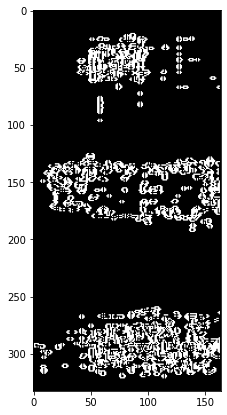

In [329]:
sobelx = cv2.Sobel(placien,cv2.CV_16S,1,0,ksize=1)
sobelx= cv2.convertScaleAbs(sobelx)
plotimg(sobelx)

In [330]:
import numpy as np
kernel = np.ones((2,2), np.uint8)

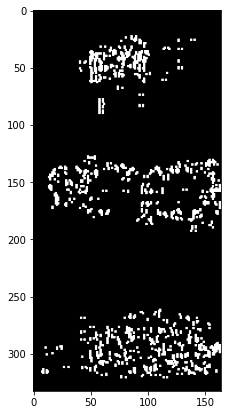

In [331]:
openimg = cv2.morphologyEx(sobelx, cv2.MORPH_OPEN, kernel)
plotimg(openimg)

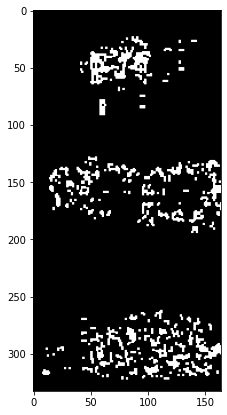

In [332]:
closeimg = cv2.morphologyEx(openimg, cv2.MORPH_CLOSE, kernel)
plotimg(closeimg)

In [333]:
contours, _ = cv2.findContours(sobelx, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    cv2.fillConvexPoly(img, cnt, (0, 0, 0))
    epsilon = 0.000001 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 1)
contours, _ = cv2.findContours(closeimg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
      cv2.fillConvexPoly(img, cnt, (0, 0, 0))
      epsilon = 0.000001 * cv2.arcLength(cnt, True)
      approx = cv2.approxPolyDP(cnt, epsilon, True)
      cv2.drawContours(img, [approx], 0, (0, 0, 0), 1)
contours, _ = cv2.findContours(openimg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
      cv2.fillConvexPoly(img, cnt, (0, 0, 0))
      epsilon = 0.000001 * cv2.arcLength(cnt, True)
      approx = cv2.approxPolyDP(cnt, epsilon, True)
      cv2.drawContours(img, [approx], 0, (0, 0, 0), 1)

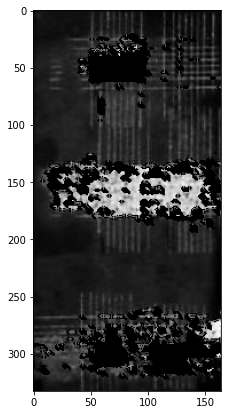

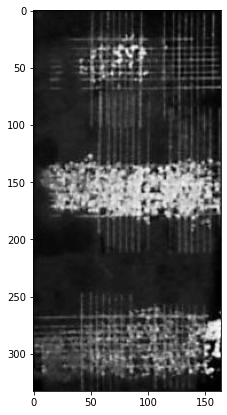

(None, None)

In [334]:
im = cv2.imread("/content/drive/MyDrive/Quadrillage/253.jpg", 0)
plotimg(img), plotimg(im)

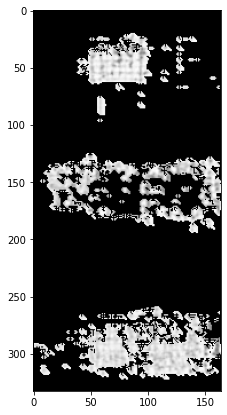

In [335]:
blank = abs(img - im)
plotimg(blank)

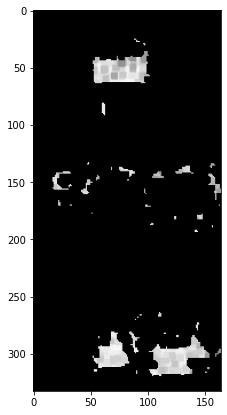

In [336]:
bl = cv2.erode(blank, kernel, iterations=4)
plotimg(bl)

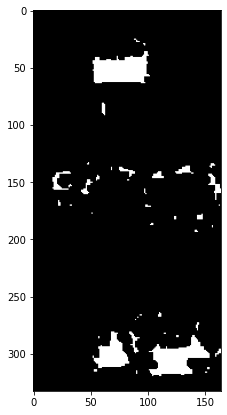

In [337]:
ret, thresh = cv2.threshold(bl, 100, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plotimg(thresh)

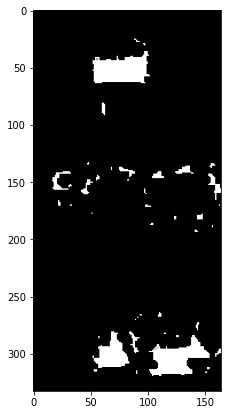

In [338]:
contours, _ = cv2.findContours(bl, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    cv2.fillConvexPoly(bl, cnt, (255, 255, 255))
    epsilon = 0.000001 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(bl, [approx], 0, (255, 255, 255), 1)
plotimg(bl)

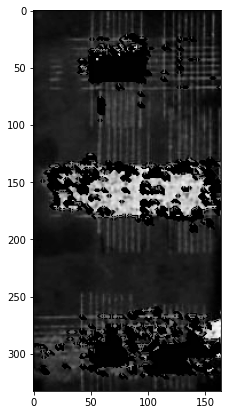

In [339]:
result = abs(img - bl)
plotimg(result)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


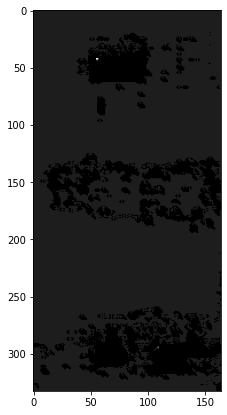

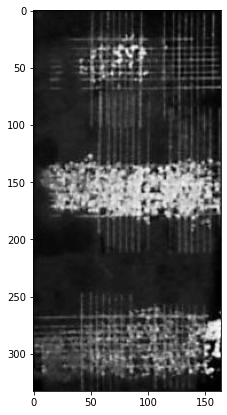

(None, None)

In [340]:
resultfinal =abs((result) / im)
resultfinal = cv2.convertScaleAbs(resultfinal)
plotimg(resultfinal), plotimg(im)

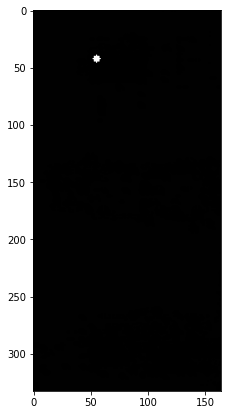

In [341]:
corners = cv2.goodFeaturesToTrack(resultfinal, 100, 0.1, 10)
corners = np.int0(corners)
for i in corners:
  x, y = i.ravel()
  cv2.circle(resultfinal, (x, y), 3, 255, -1)
plotimg(resultfinal)

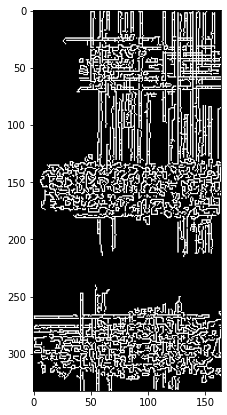

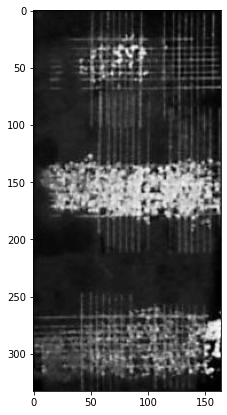

(None, None)

In [342]:
img_1 = cv2.imread("/content/drive/MyDrive/Quadrillage/253.jpg", 0)
edges = cv2.Canny(img_1, 10, 100)
plotimg(edges), plotimg(img_1)

In [343]:
print(edges)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [344]:
edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [345]:
edges[100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 255,   0, 255,   0,   0,   0, 255,   0,
         0,   0,   0,   0, 255,   0,   0, 255,   0, 255,   0,   0, 255,
         0, 255,   0,   0, 255,   0,   0, 255,   0,   0, 255,   0,   0,
         0, 255,   0, 255,   0,   0,   0,   0, 255,   0, 255,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 255,   0,   0, 255,   0,   0,   0,   0, 255,   0,   0, 255,
         0,   0, 255,   0, 255,   0,   0, 255, 255, 255,   0,   0, 255,
         0,   0, 255,   0,   0, 255,   0, 255,   0,   0, 255,   0, 255,
         0,   0,   0,   0,   0, 255,   0,   0], dtype=uint8)

In [346]:
indx = 0
indx_pix_in_i = 0
for i in edges:
  indx +=1
  whithe = []
  for pix in i:
    if pix == 255:
      whithe.append(indx_pix_in_i)
      indx_pix_in_i += 1
  print(len(whithe))

7
27
36
32
32
30
32
33
32
32
30
31
30
30
30
31
29
30
31
26
27
32
28
40
93
34
92
26
25
27
31
49
69
35
55
43
36
56
35
59
36
32
68
59
58
57
27
60
51
47
53
38
31
89
31
64
42
28
75
58
49
74
25
18
27
28
66
57
54
87
15
32
22
36
25
27
25
23
25
26
24
27
26
29
32
32
33
33
30
32
31
37
35
33
33
37
34
35
35
30
31
32
38
30
29
30
31
30
32
29
28
31
31
32
30
30
30
30
33
31
32
33
31
33
30
33
39
32
30
28
35
30
32
46
51
63
45
62
57
44
59
66
53
71
49
56
61
64
51
53
60
59
55
57
67
47
61
59
42
60
46
45
46
48
50
59
44
57
53
57
62
42
54
70
47
40
40
33
43
52
50
50
16
23
13
17
17
21
17
19
16
17
16
17
14
16
13
13
14
13
17
14
12
15
12
12
12
12
12
11
11
15
8
2
2
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
4
3
2
9
6
9
8
7
7
8
8
9
10
12
11
13
23
25
26
32
24
21
99
57
48
108
29
35
31
33
62
89
59
89
51
56
71
64
70
60
49
78
71
52
63
54
61
63
57
71
52
59
65
62
62
68
53
60
58
59
62
59
47
46
44
57
59
47
69
62
46
52
45
52
42
46
34
34
29
17
18
18
14
14
14
15
14
11
6


In [347]:
indx = 0
array = np.array(edges)
edges_t = array.T
for i in range(len(edges_t)):
  print(edges_t[i])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [348]:
count = np.count_nonzero(edges_t == 255)

11650


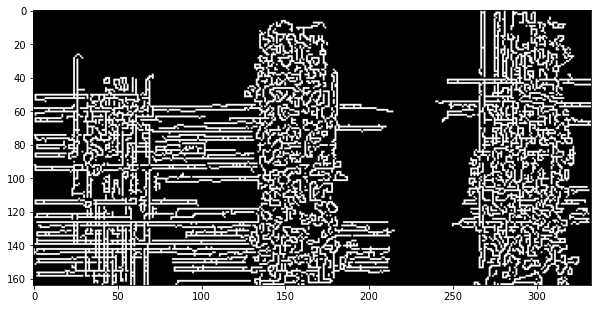

In [349]:
print(count)
a = edges_t
plotimg(a)

In [350]:
h = edges_t
for i in range(len(h)):
  count = np.count_nonzero(h[i] == 255)
  if count >= len(edges)*0.4:
    matrix = h[i]
    matrix[matrix > 0] = 0
    h[i] = matrix

In [351]:
from numpy.lib.function_base import gradient
grx, gry = gradient(h)

In [352]:
print(grx)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


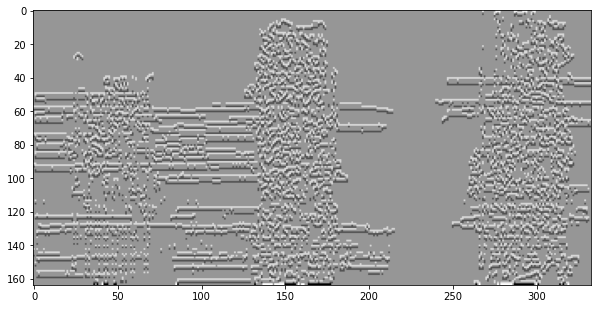

In [353]:
plotimg(grx)

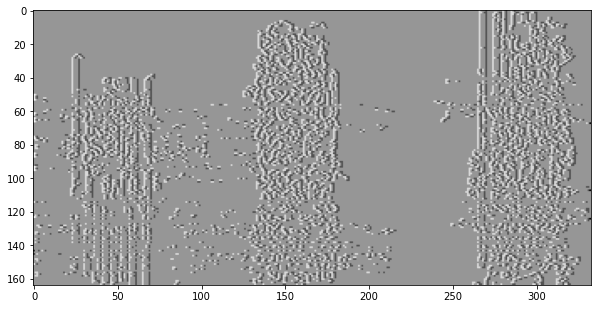

In [354]:
plotimg(gry)

In [357]:
grx_x, grx_y = gradient(grx)

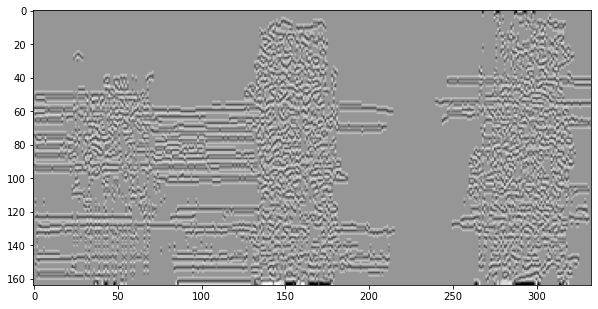

In [358]:
plotimg(grx_x)

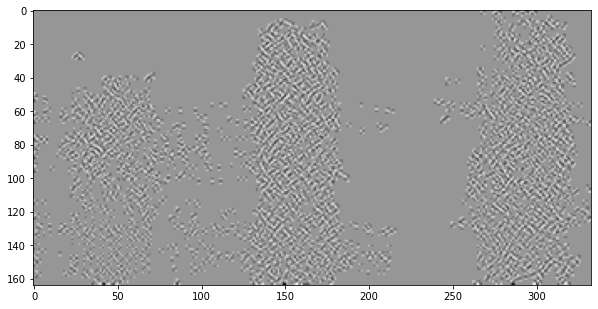

In [359]:
plotimg(grx_y)

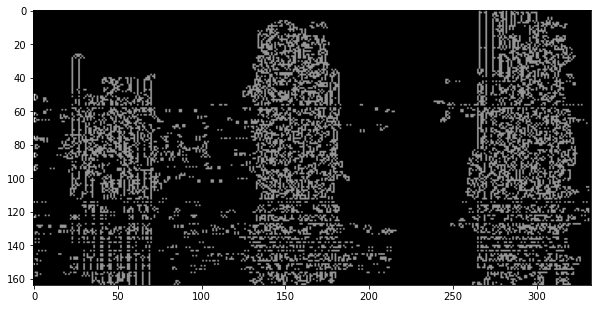

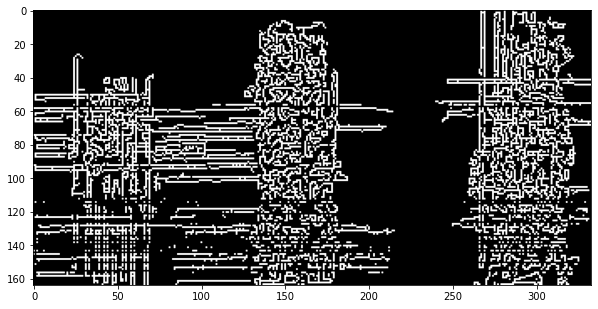

(None, None)

In [367]:
result = gry.astype(np.uint8)
plotimg(result), plotimg(array.T)